In [1]:
!pip install torch torchvision matplotlib

In [73]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

In [65]:
train_data = datasets.MNIST(
    root='data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root='data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [66]:
loaders = {

    'train': DataLoader(
        train_data,
        batch_size=100,
        shuffle=True,
        num_workers=1),

    'test': DataLoader(
        test_data,
        batch_size=100,
        shuffle=True,
        num_workers=1)
}

In [67]:
class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)


  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [68]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train epoch: {epoch} loss: {loss.item()}')
      # print(f'Train epoch: {epoch} [{batch_idx*len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6}')


def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:

      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
      accuracy = 100. * correct / len(loaders['test'].dataset)


    test_loss /= len(loaders['test'].dataset)
    print(f'Test avg loss: {test_loss:.4f}, Accuracy: {accuracy}')


In [69]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-67-bc8f16090772>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train epoch: 1 loss: 2.3047049045562744
Train epoch: 1 loss: 2.2856056690216064
Train epoch: 1 loss: 2.1534931659698486
Train epoch: 1 loss: 2.046046018600464
Train epoch: 1 loss: 1.9334192276000977
Train epoch: 1 loss: 1.8670945167541504
Train epoch: 1 loss: 1.7992966175079346
Train epoch: 1 loss: 1.7418971061706543
Train epoch: 1 loss: 1.6560996770858765
Train epoch: 1 loss: 1.66275954246521
Train epoch: 1 loss: 1.6802260875701904
Train epoch: 1 loss: 1.6645525693893433
Train epoch: 1 loss: 1.65763258934021
Train epoch: 1 loss: 1.662642002105713
Train epoch: 1 loss: 1.692381739616394
Train epoch: 1 loss: 1.6834471225738525
Train epoch: 1 loss: 1.645754098892212
Train epoch: 1 loss: 1.660354733467102
Train epoch: 1 loss: 1.6398364305496216
Train epoch: 1 loss: 1.563940167427063
Train epoch: 1 loss: 1.5798065662384033
Train epoch: 1 loss: 1.6587013006210327
Train epoch: 1 loss: 1.6255173683166504
Train epoch: 1 loss: 1.5866116285324097
Train epoch: 1 loss: 1.5887565612792969
Train epoc

KeyboardInterrupt: ignored

Prediction: 7


<ipython-input-67-bc8f16090772>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


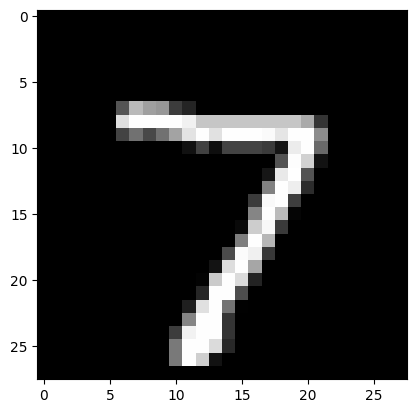

In [70]:
import matplotlib.pyplot as plt

model.eval()
data, target = test_data[0]
data = data.unsqueeze(0).to(device)

output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image,cmap='gray')
plt.show()

In [71]:
print(torch.__version__)

2.1.0+cu118


In [75]:
import torchvision
print(torchvision.__version__)

0.16.0+cu118


In [77]:
import matplotlib
print(matplotlib.__version__)

3.7.1


In [78]:

import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [80]:
# !pip list

In [81]:
import numpy as np
print(np.__version__)

1.23.5
